Shapes: (5625, 30) (1407, 30)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


ANN Accuracy: 0.7754

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.53      0.56       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.77      0.78      0.77      1407



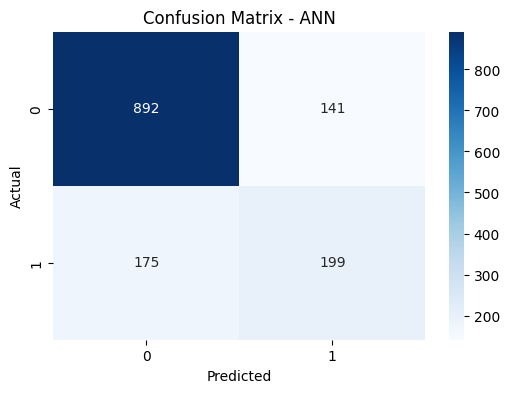

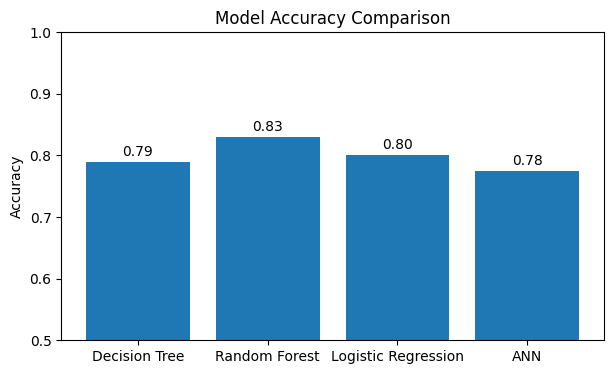

In [8]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Load cleaned dataset
df = pd.read_csv('/Customer-Churn-Cleaned.csv')
df.head()
# Basic preprocessing
# Ensure target is numeric
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# One-hot encode categorical features (if any)
X = pd.get_dummies(X, drop_first=True)

# Train-test split (stratify to preserve class ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Scale features for ANN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shapes:", X_train_scaled.shape, X_test_scaled.shape)
# Define and train ANN (MLPClassifier) - architecture: (16, 8)
ann = MLPClassifier(hidden_layer_sizes=(16,8), max_iter=300, random_state=42)
ann.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = ann.predict(X_test_scaled)
ann_acc = accuracy_score(y_test, y_pred)
print('ANN Accuracy:', round(ann_acc, 4))
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))
# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - ANN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Compare with earlier model accuracies — replace values if your recorded ones differ
models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'ANN']
accuracies = [0.79, 0.83, 0.80, round(ann_acc,4)]

plt.figure(figsize=(7,4))
bars = plt.bar(models, accuracies)
plt.ylim(0.5,1)
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, acc + 0.01, f"{acc:.2f}", ha='center')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()
